In [2]:
#importation de packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("scorm_tracking_copy.csv",sep=";")
df

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,48.0,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,5.0,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,18.0,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,3.0,1,2018-12-13 11:23:55,2018-12-13 11:23:59,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


# Hypothesese1

In [4]:
apprenant=df.groupby(['object_id']).actor.nunique()
apprenant

object_id
632-le-hibou-grand-duc                             1
669-vallee-trient-finhaut-source-de-bien-etre      1
671-presentation                                 340
674-strategie-et-croissance                      327
677-affaires-medicales                           322
                                                ... 
824-nescens                                       12
825-die-dienstleistungen-f-r-den-patienten        61
826-i-servizi-ai-pazienti                         12
827-quiz                                          60
828-quiz                                          12
Name: actor, Length: 152, dtype: int64

In [5]:
session=df.groupby(['object_id']).session_uuid.count()
session

object_id
632-le-hibou-grand-duc                             1
669-vallee-trient-finhaut-source-de-bien-etre      1
671-presentation                                 634
674-strategie-et-croissance                      471
677-affaires-medicales                           469
                                                ... 
824-nescens                                       22
825-die-dienstleistungen-f-r-den-patienten       156
826-i-servizi-ai-pazienti                         35
827-quiz                                         283
828-quiz                                          81
Name: session_uuid, Length: 152, dtype: int64

In [6]:
smin=df.groupby(['object_id']).score.min()
smin

object_id
632-le-hibou-grand-duc                           0.0
669-vallee-trient-finhaut-source-de-bien-etre    0.0
671-presentation                                 0.0
674-strategie-et-croissance                      0.0
677-affaires-medicales                           0.0
                                                ... 
824-nescens                                      0.0
825-die-dienstleistungen-f-r-den-patienten       0.0
826-i-servizi-ai-pazienti                        0.0
827-quiz                                         0.0
828-quiz                                         0.0
Name: score, Length: 152, dtype: float64

In [7]:
smax=df.groupby(['object_id']).score.max()
smax

object_id
632-le-hibou-grand-duc                             0.0
669-vallee-trient-finhaut-source-de-bien-etre      0.0
671-presentation                                 100.0
674-strategie-et-croissance                      100.0
677-affaires-medicales                           100.0
                                                 ...  
824-nescens                                        0.0
825-die-dienstleistungen-f-r-den-patienten       100.0
826-i-servizi-ai-pazienti                        100.0
827-quiz                                         100.0
828-quiz                                         100.0
Name: score, Length: 152, dtype: float64

In [8]:

tdr50=df[(df['score'] >= 50)].groupby(['object_id']).actor.nunique()
#tdr50=df[df['score'] >= 50]
#tdr50

In [9]:
#taux_de_reussite=tdr50.groupby(['object_id', 'actor']).score.max()
taux_de_reussite=(tdr50/apprenant)*100
taux_de_reussite

object_id
632-le-hibou-grand-duc                                 NaN
669-vallee-trient-finhaut-source-de-bien-etre          NaN
671-presentation                                 90.588235
674-strategie-et-croissance                      91.131498
677-affaires-medicales                           91.614907
                                                   ...    
824-nescens                                            NaN
825-die-dienstleistungen-f-r-den-patienten       91.803279
826-i-servizi-ai-pazienti                        83.333333
827-quiz                                         83.333333
828-quiz                                         58.333333
Name: actor, Length: 152, dtype: float64

In [10]:
ntd=taux_de_reussite.sort_values(ascending=False)
fin=ntd.fillna(0)
fin

object_id
752-etudes-de-cas-et-questions                   99.186992
734-risques-psychosociaux                        98.387097
819-informatique                                 98.305085
755-verhalten-des-mitarbeitenden                 97.872340
761-fallstudien-und-fragen                       97.752809
                                                   ...    
816-krankheits-und-unfallbedingte-abwesenheit     0.000000
818-nescens                                       0.000000
820-formation                                     0.000000
823-nescens                                       0.000000
824-nescens                                       0.000000
Name: actor, Length: 152, dtype: float64

In [11]:
z={'actor':apprenant, 'session':session, 'score min':smin, 'score max':smax,'taux_de_reussite':fin }
new_df=pd.DataFrame(z)
new_df

,actor,session,score min,score max,taux_de_reussite
object_id,,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
671-presentation,340,634,0.0,100.0,90.588235
674-strategie-et-croissance,327,471,0.0,100.0,91.131498
677-affaires-medicales,322,469,0.0,100.0,91.614907
...,...,...,...,...,...
824-nescens,12,22,0.0,0.0,0.000000
825-die-dienstleistungen-f-r-den-patienten,61,156,0.0,100.0,91.803279
826-i-servizi-ai-pazienti,12,35,0.0,100.0,83.333333


In [12]:
new_df.reset_index()

,object_id,actor,session,score min,score max,taux_de_reussite
0,632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
1,669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
2,671-presentation,340,634,0.0,100.0,90.588235
3,674-strategie-et-croissance,327,471,0.0,100.0,91.131498
4,677-affaires-medicales,322,469,0.0,100.0,91.614907
...,...,...,...,...,...,...
147,824-nescens,12,22,0.0,0.0,0.000000
148,825-die-dienstleistungen-f-r-den-patienten,61,156,0.0,100.0,91.803279
149,826-i-servizi-ai-pazienti,12,35,0.0,100.0,83.333333
150,827-quiz,60,283,0.0,100.0,83.333333


In [13]:
# ika=top10.taux_de_reussite.to_numpy()
# ika

In [14]:
# z=[i for i in range(1, ika.size + 1)] 
# plt.barh(ika, z, height=0.1)
# plt.ylabel('mdules')
# plt.title('module group by tau de reussite')
# plt.xlabel('taux de reussite')
# plt.show()


In [15]:
#Avec seaborn
#sns.histplot(new_df.taux_de_reussite, kde=True)
#plt.show()

In [16]:
new_df.sort_values(by='taux_de_reussite', ascending=False, inplace=True)
top10 = new_df.head(10)
top10

,actor,session,score min,score max,taux_de_reussite
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.186992
734-risques-psychosociaux,124,153,0.0,100.0,98.387097
819-informatique,59,68,0.0,100.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,0.0,100.0,97.872340
761-fallstudien-und-fragen,89,242,0.0,100.0,97.752809
765-urlaub,88,308,0.0,100.0,97.727273
766-unbezahlter-urlaub,88,188,0.0,100.0,97.727273
729-salaire,129,255,0.0,100.0,97.674419
747-modification-des-rapports-de-travail,124,242,0.0,100.0,97.580645


In [17]:
top_viz=top10.reset_index()
top_viz

,object_id,actor,session,score min,score max,taux_de_reussite
0,752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.186992
1,734-risques-psychosociaux,124,153,0.0,100.0,98.387097
2,819-informatique,59,68,0.0,100.0,98.305085
3,755-verhalten-des-mitarbeitenden,94,233,0.0,100.0,97.872340
4,761-fallstudien-und-fragen,89,242,0.0,100.0,97.752809
5,765-urlaub,88,308,0.0,100.0,97.727273
6,766-unbezahlter-urlaub,88,188,0.0,100.0,97.727273
7,729-salaire,129,255,0.0,100.0,97.674419
8,747-modification-des-rapports-de-travail,124,242,0.0,100.0,97.580645
9,736-conge-non-paye,122,270,0.0,100.0,96.721311


In [18]:
#top_viz = df.melt('X_Axis', var_name='object_id', value_name='vals')
#sns.pointplot(x="X_Axis", y="vals", hue='object_id', data=top_viz)
#ax = top_viz.plot(style='ro', legend=True)
#top_viz.plot(style='bo',ax=ax, legend=True)
#plt.show()

In [19]:
nmp=top10.to_numpy()
top10.index

Index(['752-etudes-de-cas-et-questions', '734-risques-psychosociaux',
       '819-informatique', '755-verhalten-des-mitarbeitenden',
       '761-fallstudien-und-fragen', '765-urlaub', '766-unbezahlter-urlaub',
       '729-salaire', '747-modification-des-rapports-de-travail',
       '736-conge-non-paye'],
      dtype='object', name='object_id')

# Partie 2

In [20]:
first=new_df.head(1)
first.index[0]
last=new_df.tail(1)
last.index[0]
#new_df

'632-le-hibou-grand-duc'

In [21]:
data_first=df.loc[df['object_id']==first.index[0]].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
data_first.head(10)

,session_uuid,temps,score
,count,sum,max
actor,,,
dtic@mobiletic.com,4,1546.0,83.0
ga2018_05n7@yopmail.com,1,425.0,67.0
ga2018_096a@yopmail.com,4,481.0,100.0
ga2018_0buu@yopmail.com,1,236.0,67.0
ga2018_0hot@yopmail.com,1,449.0,67.0
ga2018_0jap@yopmail.com,1,532.0,100.0
ga2018_0kf4@yopmail.com,1,401.0,50.0
ga2018_0yno@yopmail.com,1,183.0,83.0


In [67]:
top_viz=data_first.reset_index()
top_viz

,actor,temps,score
,,sum,max
0,dtic@mobiletic.com,1546.0,83.0
1,ga2018_05n7@yopmail.com,425.0,67.0
2,ga2018_096a@yopmail.com,481.0,100.0
3,ga2018_0buu@yopmail.com,236.0,67.0
4,ga2018_0hot@yopmail.com,449.0,67.0
...,...,...,...
118,ga2018_xovt@yopmail.com,316.0,50.0
119,ga2018_xsog@yopmail.com,380.0,83.0
120,ga2018_yap3@yopmail.com,686.0,100.0


In [68]:
data_first['Resultat_final']= 0
data_first.loc[data_first.score['max']>=50, 'Resultat_final']=1
data_first.head(10)

,temps,score,Resultat_final
,sum,max,
actor,,,
dtic@mobiletic.com,1546.0,83.0,1
ga2018_05n7@yopmail.com,425.0,67.0,1
ga2018_096a@yopmail.com,481.0,100.0,1
ga2018_0buu@yopmail.com,236.0,67.0,1
ga2018_0hot@yopmail.com,449.0,67.0,1
ga2018_0jap@yopmail.com,532.0,100.0,1
ga2018_0kf4@yopmail.com,401.0,50.0,1
ga2018_0yno@yopmail.com,183.0,83.0,1


In [24]:
last=df.loc[df['object_id']==last.index[0]].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
last

,session_uuid,temps,score
,count,sum,max
actor,,,
alexandre.comby@mobiletic.com,1,0.0,0.0


In [25]:
#last['Resultat_final']= 0
data_first.loc[data_first.score['max']>=50, 'Resultat_final']=1
data_first.head(10)


,session_uuid,temps,score,Resultat_final
,count,sum,max,
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
ga2018_0jap@yopmail.com,1,532.0,100.0,1
ga2018_0kf4@yopmail.com,1,401.0,50.0,1
ga2018_0yno@yopmail.com,1,183.0,83.0,1


# La visualisation

## pour les top 10

In [26]:
data_first=df.loc[df['object_id']==first.index[0]].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
dt1=data_first.reset_index()
dt1

,actor,session_uuid,temps,score
,,count,sum,max
0,dtic@mobiletic.com,4,1546.0,83.0
1,ga2018_05n7@yopmail.com,1,425.0,67.0
2,ga2018_096a@yopmail.com,4,481.0,100.0
3,ga2018_0buu@yopmail.com,1,236.0,67.0
4,ga2018_0hot@yopmail.com,1,449.0,67.0
...,...,...,...,...
118,ga2018_xovt@yopmail.com,1,316.0,50.0
119,ga2018_xsog@yopmail.com,1,380.0,83.0
120,ga2018_yap3@yopmail.com,1,686.0,100.0


In [27]:
#dt1=pd.concat([dt1.temps, dt1.score])
dt2=dt1[['temps','score']]
dt2

,temps,score
,sum,max
0,1546.0,83.0
1,425.0,67.0
2,481.0,100.0
3,236.0,67.0
4,449.0,67.0
...,...,...
118,316.0,50.0
119,380.0,83.0
120,686.0,100.0


In [28]:
#dt1.temps

In [29]:
dt2=dt2.to_numpy()



In [30]:
dt2.shape

(123, 2)

In [31]:
x=dt2[:,0]
y=dt2[:,1]

    
x
y  

array([ 83.,  67., 100.,  67.,  67., 100.,  50.,  83.,  83.,  67.,  83.,
       100., 100., 100.,  67., 100., 100.,  67., 100.,  83.,  67., 100.,
       100., 100., 100., 100.,  83.,  50.,  67., 100.,  67.,  83., 100.,
        67.,  83., 100., 100.,  50., 100., 100.,  83., 100., 100.,  83.,
        83., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        83., 100., 100.,  33., 100., 100.,  83.,  83.,  83.,  67.,  83.,
       100., 100.,  83.,  83.,  83.,  50.,  50.,  67., 100., 100., 100.,
        83., 100., 100.,  83.,  50., 100.,  83.,  83., 100., 100., 100.,
        67., 100.,  83.,  67., 100.,  83., 100., 100.,  83.,  83., 100.,
       100., 100.,  83., 100., 100.,  83.,  83., 100., 100., 100., 100.,
        50.,  83.,  67.,  83.,  83.,  67., 100., 100.,  50.,  83., 100.,
        83.,  50.])

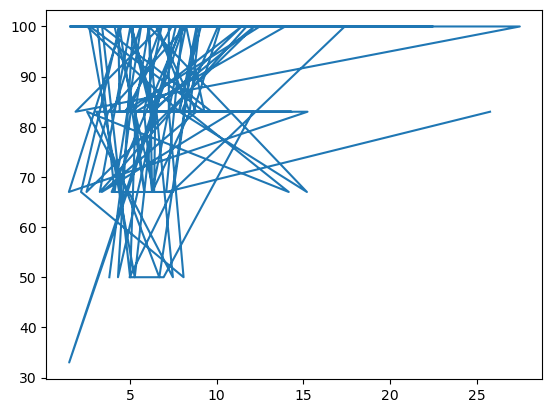

In [32]:
plt.plot(x/60, y)
plt.show()

In [33]:
top_viz

,actor,session_uuid,temps,score
,,count,sum,max
0,dtic@mobiletic.com,4,1546.0,83.0
1,ga2018_05n7@yopmail.com,1,425.0,67.0
2,ga2018_096a@yopmail.com,4,481.0,100.0
3,ga2018_0buu@yopmail.com,1,236.0,67.0
4,ga2018_0hot@yopmail.com,1,449.0,67.0
...,...,...,...,...
118,ga2018_xovt@yopmail.com,1,316.0,50.0
119,ga2018_xsog@yopmail.com,1,380.0,83.0
120,ga2018_yap3@yopmail.com,1,686.0,100.0


In [34]:
data_first=df.loc[df['object_id']==first.index[0]].groupby('actor').agg({'temps':['sum'],  'score':['max']})
dt1=data_first.head(10).reset_index()
dt1

,actor,temps,score
,,sum,max
0,dtic@mobiletic.com,1546.0,83.0
1,ga2018_05n7@yopmail.com,425.0,67.0
2,ga2018_096a@yopmail.com,481.0,100.0
3,ga2018_0buu@yopmail.com,236.0,67.0
4,ga2018_0hot@yopmail.com,449.0,67.0
5,ga2018_0jap@yopmail.com,532.0,100.0
6,ga2018_0kf4@yopmail.com,401.0,50.0
7,ga2018_0yno@yopmail.com,183.0,83.0
8,ga2018_1828@yopmail.com,657.0,83.0


In [75]:
def ma_fonction(object):
    data_first=df.loc[df['object_id']==object].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
    dt1=data_first.reset_index()
    dt2=dt1[['temps','score']]
    dt2=dt2.to_numpy()
    x=dt2[:,0]
    y=dt2[:,1]
      
    return x, y
x,y = ma_fonction("752-etudes-de-cas-et-questions")
x
y


array([ 83.,  67., 100.,  67.,  67., 100.,  50.,  83.,  83.,  67.,  83.,
       100., 100., 100.,  67., 100., 100.,  67., 100.,  83.,  67., 100.,
       100., 100., 100., 100.,  83.,  50.,  67., 100.,  67.,  83., 100.,
        67.,  83., 100., 100.,  50., 100., 100.,  83., 100., 100.,  83.,
        83., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        83., 100., 100.,  33., 100., 100.,  83.,  83.,  83.,  67.,  83.,
       100., 100.,  83.,  83.,  83.,  50.,  50.,  67., 100., 100., 100.,
        83., 100., 100.,  83.,  50., 100.,  83.,  83., 100., 100., 100.,
        67., 100.,  83.,  67., 100.,  83., 100., 100.,  83.,  83., 100.,
       100., 100.,  83., 100., 100.,  83.,  83., 100., 100., 100., 100.,
        50.,  83.,  67.,  83.,  83.,  67., 100., 100.,  50.,  83., 100.,
        83.,  50.])

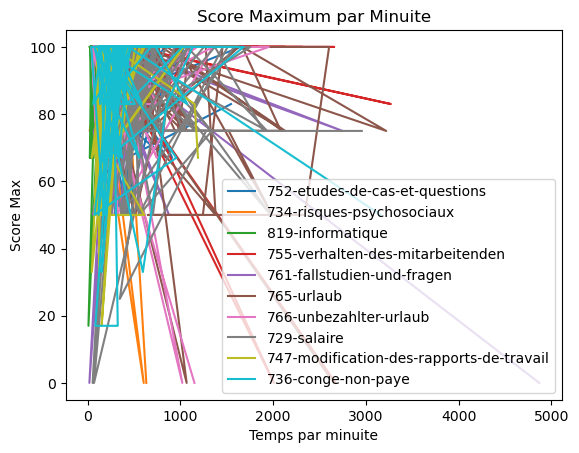

In [36]:
for index in top10.index:
    x,y=ma_fonction(index)
    plt.plot(x,y,label=index)
    
plt.title('Score Maximum par Minuite')
plt.xlabel('Temps par minuite')
plt.ylabel('Score Max')
plt.legend()
plt.show()

## Diagramme en Baton

In [71]:
#plt.bar(top10.taux_de_reussite, height)
diagra=top10.taux_de_reussite.to_numpy()
for index in top10.index:
    x,y=ma_fonction(index)
    z=[i for i in range(1, diagra.size + 1)] 
    plt.bar(z, diagra, label=index)


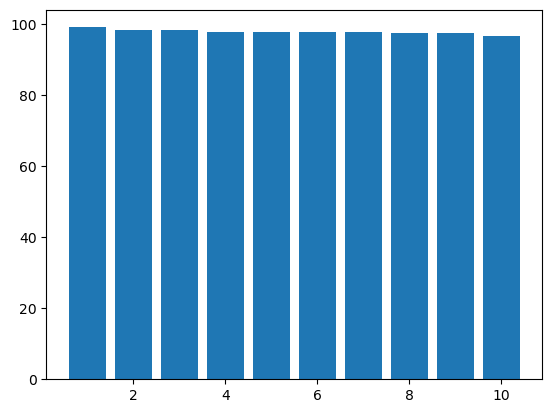

In [72]:

plt.show()


## pour les 3 trop

In [39]:
new_df.sort_values(by='taux_de_reussite', ascending=False, inplace=True)
top3 = new_df.head(3)
top3

,actor,session,score min,score max,taux_de_reussite
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.186992
734-risques-psychosociaux,124,153,0.0,100.0,98.387097
819-informatique,59,68,0.0,100.0,98.305085


In [40]:
top3.reset_index()

,object_id,actor,session,score min,score max,taux_de_reussite
0,752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.186992
1,734-risques-psychosociaux,124,153,0.0,100.0,98.387097
2,819-informatique,59,68,0.0,100.0,98.305085


In [41]:

add_rang=df.loc[df['object_id']=='752-etudes-de-cas-et-questions'].groupby('actor').agg({'score': 'max'})
add_rang.sort_values(['score'],ascending=False, inplace=True)
add_rang['rang']=[i for i in range(1, add_rang.score.size +1)]
add_rang

,score,rang
actor,,
ga2018_akqr@yopmail.com,100.0,1
ga2018_dbf5@yopmail.com,100.0,2
ga2018_f4rf@yopmail.com,100.0,3
ga2018_exvl@yopmail.com,100.0,4
ga2018_eit6@yopmail.com,100.0,5
...,...,...
ga2018_jh1p@yopmail.com,50.0,119
ga2018_a9i7@yopmail.com,50.0,120
ga2018_vijq@yopmail.com,50.0,121


In [42]:
add_rang.reset_index()


,actor,score,rang
0,ga2018_akqr@yopmail.com,100.0,1
1,ga2018_dbf5@yopmail.com,100.0,2
2,ga2018_f4rf@yopmail.com,100.0,3
3,ga2018_exvl@yopmail.com,100.0,4
4,ga2018_eit6@yopmail.com,100.0,5
...,...,...,...
118,ga2018_jh1p@yopmail.com,50.0,119
119,ga2018_a9i7@yopmail.com,50.0,120
120,ga2018_vijq@yopmail.com,50.0,121
121,ga2018_zs6b@yopmail.com,50.0,122


In [43]:
kk=add_rang.to_numpy()
x=kk[:,0]
y=kk[:,1]
x
y

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.])

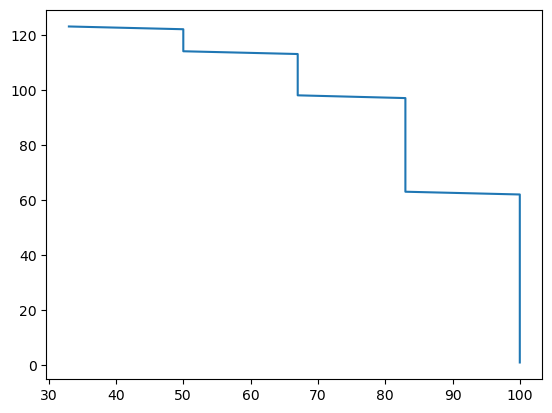

In [44]:
plt.plot(x, y)
plt.show()

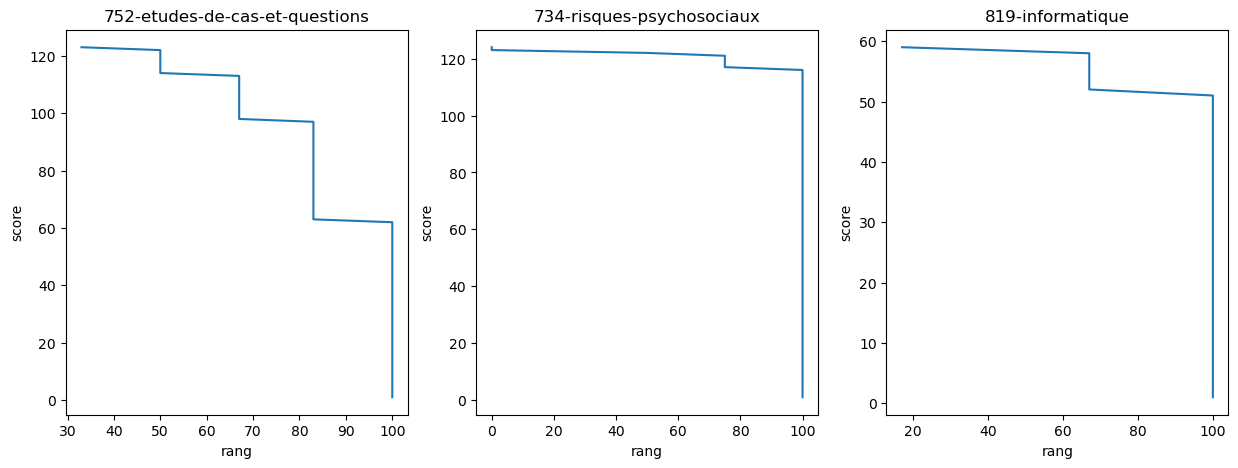

In [45]:
def fct_top3(object):
    #data_first=df.loc[df['object_id']==object].groupby('actor').agg({'rang':['rank'],'score max':['max']})
    add_rang=df.loc[df['object_id']==object].groupby('actor').agg({'score': 'max'})
    add_rang.sort_values(['score'],ascending=False, inplace=True)
    add_rang['rang']=[i for i in range(1, add_rang.score.size +1)]
    add_rang.reset_index()
    kk=add_rang.to_numpy()
    x=kk[:,0]
    y=kk[:,1]
    
   
    return  x, y
fig, axs  = plt.subplots(1, 3, figsize=(15,5))
for i in range(0,top3.index.size):
    x,y=fct_top3(top3.index[i])
    axs[i].plot(x,y,label=top3.index[i])
    
    axs[i].set_title(top3.index[i])
    axs[i].set_xlabel('rang')
    axs[i].set_ylabel('score')
    

## pour les derniers

représenter l’ensemble par un nuage de points dans un même repère sur une même figure. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.


In [46]:
#rang=df.groupby(['object_id']).actor.rank()
#rang

In [47]:
z={'actor':apprenant, 'session':session, 'score min':smin, 'score max':smax,'taux_de_reussite':fin }
new_df=pd.DataFrame(z)
new_df

,actor,session,score min,score max,taux_de_reussite
object_id,,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
671-presentation,340,634,0.0,100.0,90.588235
674-strategie-et-croissance,327,471,0.0,100.0,91.131498
677-affaires-medicales,322,469,0.0,100.0,91.614907
...,...,...,...,...,...
824-nescens,12,22,0.0,0.0,0.000000
825-die-dienstleistungen-f-r-den-patienten,61,156,0.0,100.0,91.803279
826-i-servizi-ai-pazienti,12,35,0.0,100.0,83.333333


In [48]:
new_df.reset_index()

,object_id,actor,session,score min,score max,taux_de_reussite
0,632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
1,669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
2,671-presentation,340,634,0.0,100.0,90.588235
3,674-strategie-et-croissance,327,471,0.0,100.0,91.131498
4,677-affaires-medicales,322,469,0.0,100.0,91.614907
...,...,...,...,...,...,...
147,824-nescens,12,22,0.0,0.0,0.000000
148,825-die-dienstleistungen-f-r-den-patienten,61,156,0.0,100.0,91.803279
149,826-i-servizi-ai-pazienti,12,35,0.0,100.0,83.333333
150,827-quiz,60,283,0.0,100.0,83.333333


In [49]:
tms_modules=df.groupby(['object_id']).temps.sum()
tms_modules

object_id
632-le-hibou-grand-duc                                0.0
669-vallee-trient-finhaut-source-de-bien-etre         5.0
671-presentation                                 464961.0
674-strategie-et-croissance                      233362.0
677-affaires-medicales                           276037.0
                                                   ...   
824-nescens                                        4979.0
825-die-dienstleistungen-f-r-den-patienten        45404.0
826-i-servizi-ai-pazienti                          9937.0
827-quiz                                          56891.0
828-quiz                                          11857.0
Name: temps, Length: 152, dtype: float64

In [50]:
td_reussite = new_df.taux_de_reussite
td_reussite

object_id
632-le-hibou-grand-duc                            0.000000
669-vallee-trient-finhaut-source-de-bien-etre     0.000000
671-presentation                                 90.588235
674-strategie-et-croissance                      91.131498
677-affaires-medicales                           91.614907
                                                   ...    
824-nescens                                       0.000000
825-die-dienstleistungen-f-r-den-patienten       91.803279
826-i-servizi-ai-pazienti                        83.333333
827-quiz                                         83.333333
828-quiz                                         58.333333
Name: taux_de_reussite, Length: 152, dtype: float64

In [51]:
kd={'taux_de_reussite':td_reussite, 'temps_glo':tms_modules}
ts_modules=pd.DataFrame(kd)
ts_modules.sort_values(['taux_de_reussite'],ascending=False, inplace=True)
ts_modules['rang']=[i for i in range(1, ts_modules.taux_de_reussite.size +1)]
ts_modules

,taux_de_reussite,temps_glo,rang
object_id,,,
752-etudes-de-cas-et-questions,99.186992,53556.0,1
734-risques-psychosociaux,98.387097,27595.0,2
819-informatique,98.305085,5409.0,3
755-verhalten-des-mitarbeitenden,97.872340,60375.0,4
761-fallstudien-und-fragen,97.752809,36842.0,5
...,...,...,...
774-ktg-unfall-und-krankheit,0.000000,40411.0,148
773-familienzulagen,0.000000,17983.0,149
772-arbeitslosenversicherung,0.000000,5221.0,150


In [52]:
ts_modules=ts_modules.drop(columns=['taux_de_reussite'])

In [53]:
ts_modules.reset_index()
ts_nmp=ts_modules.to_numpy()
x=ts_nmp[:,1]
y=ts_nmp[:,0]
x
y

array([5.35560e+04, 2.75950e+04, 5.40900e+03, 6.03750e+04, 3.68420e+04,
       7.30050e+04, 3.08870e+04, 7.78610e+04, 3.43870e+04, 4.29700e+04,
       5.09310e+04, 6.07130e+04, 1.01035e+05, 4.55480e+04, 8.93860e+04,
       4.45580e+04, 2.89290e+04, 3.92300e+04, 1.95070e+04, 2.22420e+04,
       7.31540e+04, 1.07844e+05, 1.13448e+05, 5.98990e+04, 8.55000e+04,
       4.69430e+04, 1.36336e+05, 3.18020e+04, 1.38452e+05, 6.14460e+04,
       1.34752e+05, 2.60080e+04, 7.80210e+04, 4.54040e+04, 3.09480e+04,
       2.76037e+05, 1.80658e+05, 2.33362e+05, 3.69410e+04, 7.81590e+04,
       2.49930e+04, 4.64961e+05, 7.65590e+04, 1.24385e+05, 3.89480e+04,
       1.15229e+05, 4.28400e+04, 1.76990e+04, 3.93570e+04, 1.18640e+05,
       5.42680e+04, 1.23520e+04, 2.20080e+04, 1.02725e+05, 5.88210e+04,
       3.63910e+04, 2.24602e+05, 5.51620e+04, 9.93700e+03, 5.68910e+04,
       1.49609e+05, 2.17900e+04, 7.15780e+04, 2.11950e+04, 4.88620e+04,
       1.35057e+05, 2.67854e+05, 1.00800e+03, 1.37336e+05, 8.126

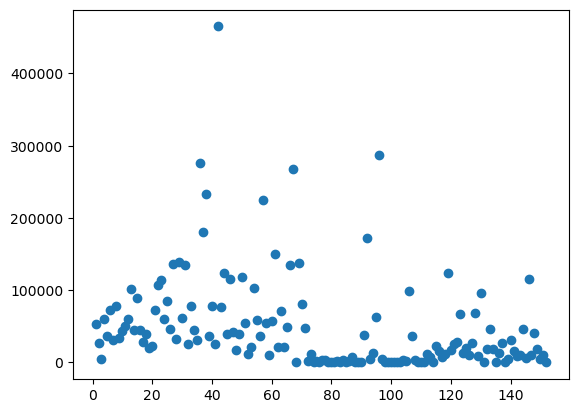

In [54]:
plt.scatter(x, y)
plt.show()

## fonction avec nuages

In [55]:
def fct_nuage():
    kd={'taux_de_reussite':td_reussite, 'temps_glo':tms_modules}
    ts_modules=pd.DataFrame(kd)
    #ts_modules=df.loc[df['object_id']==object].groupby('actor').agg({'score': 'max'})
    ts_modules.sort_values(['taux_de_reussite'],ascending=False, inplace=True)
    ts_modules['rang']=[i for i in range(1, ts_modules.taux_de_reussite.size +1)]
    ts_modules.reset_index()
    ts_nmp=ts_modules.to_numpy()
    x=ts_nmp[:,0]
    y=ts_nmp[:,1]
    
   
    
    plt.scatter(x,y,label=index)

    plt.title('Score Maximum par Minuite')
    plt.xlabel('Temps Global')
    plt.ylabel('Taux de reussite')
    plt.show()
     #return x,y 
   

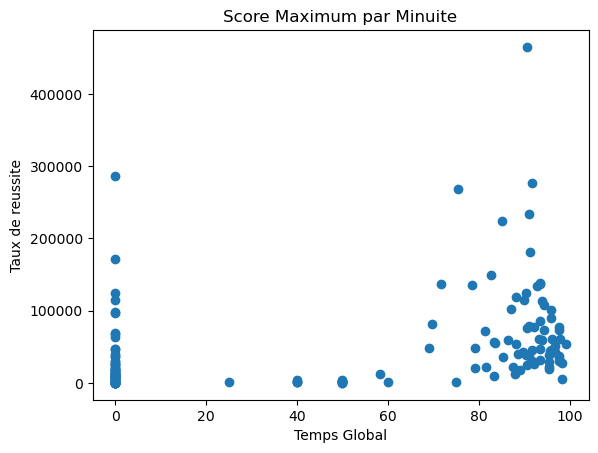

In [56]:
fct_nuage()

In [57]:
module_count=new_df.size
module_count

760

## camembert

In [59]:
#ex_final = df.groupby('')[''].sum())
classeA=new_df.loc[new_df['taux_de_reussite']>= 80].size
classeB=new_df.loc[(new_df['taux_de_reussite']>=60) & (new_df['taux_de_reussite'] < 80)].size
classeC=new_df.loc[(new_df['taux_de_reussite']>=50) & (new_df['taux_de_reussite'] < 60)].size
classeD=new_df.loc[new_df['taux_de_reussite']<50].size
sum_class=classeA + classeB + classeC + classeD
sum_class==module_count
classeA/module_count

0.4144736842105263

In [60]:
classeA=classeA/module_count
classeB=classeB/module_count
classeC=classeC/module_count
classeD=classeD/module_count
classes=np.array([classeA, classeB, classeC, classeD])
label=['A', 'B', 'C', 'D']
label
classeA



0.4144736842105263

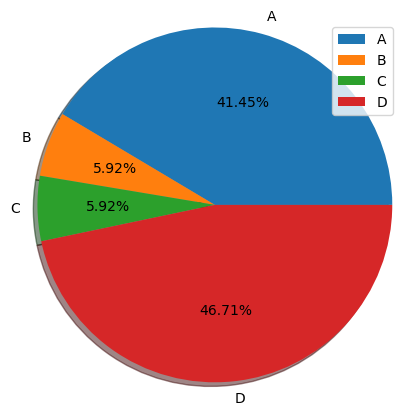

In [62]:
plt.pie(classes, labels=label, explode=[0, 0, 0, 0], shadow=True, autopct = "%0.2f%%", radius = 1.2, )
plt.legend()
plt.show()

In [86]:
def fct_camembert():
    classeA=new_df.loc[new_df['taux_de_reussite']>= 80].size
    classeB=new_df.loc[(new_df['taux_de_reussite']>=60) & (new_df['taux_de_reussite'] < 80)].size
    classeC=new_df.loc[(new_df['taux_de_reussite']>=50) & (new_df['taux_de_reussite'] < 60)].size
    classeD=new_df.loc[new_df['taux_de_reussite']<50].size
    sum_class=classeA + classeB + classeC + classeD
    sum_class==module_count
    classeA=classeA/module_count
    classeB=classeB/module_count
    classeC=classeC/module_count
    classeD=classeD/module_count
    classes=np.array([classeA, classeB, classeC, classeD])
    label=['A', 'B', 'C', 'D']
    plt.pie(classes, labels=label, explode=[0, 0, 0, 0], shadow=True, autopct = "%0.2f%%", radius = 1.2, )
    plt.legend()
    plt.show()

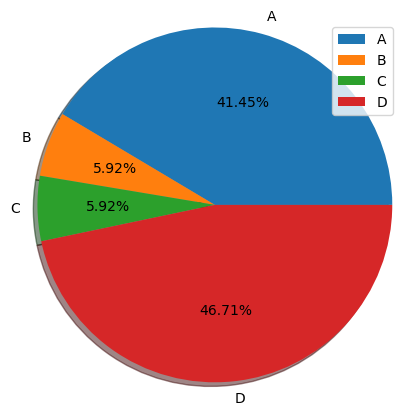

In [87]:
fct_camembert()